# TD TN20 : Roulements
## Influence de la lubrification

### Choix de l'huile adéquate

In [19]:
## Données catalogue du roulement 6307 ZZ (cf doc TD)
d = 35     # Diam. intérieur mm
D = 80     # Diam. extérieur mm
B = 21     # Largeur mm
C  = 33500 # Capacité de charge en dynamique N
C0 = 19100 # Capacité de charge en statique N
Pu = 815   # Limite de fatigue N

<img src="Viscosite_diametre_vitesse_SKF.png" width="700"/>

In [21]:
dm = (d+D)/2
print('Diametre moyen dm :%.2f mm'%dm)

Diametre moyen dm :57.50 mm


Sur ce diagramme on lit pour 3500 tr/min : viscosité : $\nu=$8 mm$^2$/s

Donc l'huile adéquate doit avoir cette viscosité à la température de fonctionnement de 110°C.
On note $\nu_1=$8 mm$^2$/s cette viscosité "optimale".

<img src="Viscosite_temperature_SKF.png" width="700"/>

Sur diagramme 6 on lit pour une abscisse à 110°C et une ordonnée à 8 mm$^2$/s, une intersection proche de la courbe ISO VG68.

Donc cette huile aura la viscosité souhaitée à 110°C.
L'huile VG320 est trop visqueuse, à la même température elle aura une viscosité de 20 mm$^2$/s environ.

### Durée de vie pour une fiabilité de 0.9 (90%)

<div class="alert alert-info">
Expression de la durée de vie en millions de tours (cf cours de TN20) :

$$L=a_1.a_\text{SKF}\left(\frac{\delta_\theta C}{P}\right)^n$$
<ul>
    <li>$C$ : Capacité de charge dynamique du roulement.</li>  
    <li>$P$ : Charge radiale équivalente.</li>  
    <li>$n=$3 , pour les billes et $n=$10/3 pour les rouleaux.</li>  
    <li>$a_1 =\left(\frac{\ln f}{\ln f_{10}}\right)^\frac{2}{3}$ : facteur de fiabilité pour la fiabilité $f$, avec $f_{10}=$0.9 la fiabilité de référence à 90%.</li>
    <li>$a_\text{SKF}$ : facteur de lubrification (cf courbe SKF).</li>
    <li>$\delta_\theta$ : facteur de température.</li>
    <img src="roulement_facteur_temperature.png" width="400"/>
 </ul>
</div>

Calcul de la charge radiale équivalente pour un roulement rigide à billes :

<div class="alert alert-info">
<img src="duree_vie_roulement_rigide_billes.svg" width="600">
    </div>

#### On commence par déterminer la charge radiale équivalente :

Calcul de $F_a/C_0$ :

In [6]:
Fr = 25000
Fa = 7000
print('Fa/C0 : %.3f'%(Fa/C0))

Fa/C0 : 0.366


Calcul de $e$ pour un jeu normal :

Ici, on détermine $e$ par interpolation :

e : 0.402


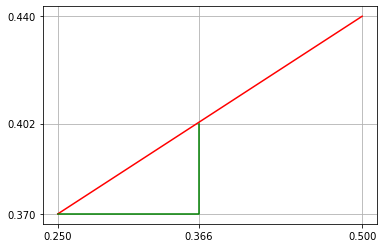

In [38]:
# Petit graphique d'explication :
import matplotlib.pyplot as plt
plt.plot([00.25,0.5],[0.37,0.44],'r-')
plt.plot([0.25,0.366,0.366],[0.37,0.37,0.402],'g-')
plt.xticks([0.25,0.366,0.5])
plt.yticks([0.37,0.402,0.44])
plt.grid()

# Le calcul d'interpolation :
e = (0.44-0.37)/(0.5-0.25)*(0.366-0.25) + 0.37
print('e : %.3f'%e)

In [18]:
print('Fa/Fr : %.3f'%(Fa/Fr))

Fa/Fr : 0.280


$F_a/F_r \leq e$ donc $P=F_r$

In [7]:
P = Fr

#### Calcul des coefficients ..

<ul>
    <li>$a_1=\left(\frac{\ln 0.9}{\ln 0.9}\right)^\frac{2}{3}=1$ pour un fiabilité à 90%</li><br>
     <li>$\delta_\theta=$1 à 110°C</li><br>
     <li> Pour $a_\text{SKF}$ il faut déteminer $P_u/P$ et $k=\nu/\nu_1$ pour utiliser la courbe fournie par SKF avec $\nu_1$ viscosité optimale et $\nu$ la viscosité de l'huide de lubrification.</li>
    </ul>

In [9]:
print('Pu/P : %.3f'%(Pu/P))

Pu/P : 0.033


Ici $k=1$ car l'huile à la viscosité idéale, sur la courbe ci-dessous on lit : $a_\text{SKF}$=0.8

<img src="Coef_askf_billes_SKF.png" width="700"/>

*Remarque :*

* Avec l'huile VG220 on aurait $\nu=$20 mm$^2$/s et $k=20/8\simeq 3$ on lirait $a_\text{SKF}>$1.0 la durée de vie augmenterait mais les pertes par frottement (et donc l'echauffement) aussi.

### Durée de vie :

In [12]:
n=3
a1=1
askf=0.8
L = a1*askf*(C/P)**n
print ('Durée de vie en Millions de Tours : %.3f'%L)

Durée de vie en Millions de Tours : 1.925


Soit en heures :

In [18]:
Lh = L*1e6/(3500*60)
print ('Durée de vie en heures : %.3f h'%Lh)

Durée de vie en heures : 9.166 h


Ordre de grandeur de durée nécessaire en heures :
* Voiture (roulement de roue, de boîte de vitesses, d'accessoires, ..) : 200 000 km à 50km/h soit 4000 heures.
* Broche de machine outil : amortissement sur 5 ans à 16h/jours -> 5 x 200 x 16 soit 16000 heures.
* Machine électroportative pour le bricolage : quelques heures d'usage sur la vie produit.
* Train : 25 ans à 300 jours/an et 16heures/jour : 25 x 300 x 16 soit 120000 heures -> prévoir des opérations de maintenance régulière pour changer les roulements compte tenu des charges supportées.